In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math, copy

In [49]:
data = pd.read_csv('data2.txt', sep=",", header=None)
X_train = data.iloc[0:, 0:2].to_numpy()
y_train = data.iloc[0:, 2].to_numpy()
data

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

In [55]:
def compute_cost(X, y, w, b) :
    m = X.shape[0]
    cost = 0.0
    for i in range(m) :
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i]) ** 2
    cost /= (2 * m)
    return cost

In [56]:
def compute_gradient(X, y, w, b) :
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    for i in range(m) :
        f_wb_i = np.dot(X[i], w) + b
        error = f_wb_i - y[i]
        for j in range(n) :
            dj_dw[j] += error * X[i, j]
        dj_db += error
    dj_dw /= m
    dj_db /= m
    return dj_db, dj_dw

In [57]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters) :
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters) :
        dj_db, dj_dw = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i < 100000 :
            J_history.append(cost_function(X, y, w, b))
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
    return w, b, J_history

In [58]:
initial_w = np.zeros(2)
initial_b = 0.0
iterations = 1500
alpha = 1.0e-2
w_final, b_final, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b, compute_cost, 
                                            compute_gradient, alpha, iterations)
print(f"b, w found by gradient descent: {b_final:0.2f}, {w_final} ")
m = X_train.shape[0]
for i in range(m):
    print(f"prediction: {np.dot(X_norm[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 64297776251.62
Iteration  150: Cost 5254909597.62
Iteration  300: Cost 2284298697.53
Iteration  450: Cost 2077712344.64
Iteration  600: Cost 2050994383.01
Iteration  750: Cost 2045263246.20
Iteration  900: Cost 2043804738.99
Iteration 1050: Cost 2043419620.30
Iteration 1200: Cost 2043317214.07
Iteration 1350: Cost 2043289948.01
b, w found by gradient descent: 340412.56, [109370.05670466  -6500.61509507] 
prediction: 356255.22, target value: 399900
prediction: 286142.88, target value: 329900
prediction: 397432.31, target value: 369000
prediction: 269181.06, target value: 232000
prediction: 472264.63, target value: 539900
prediction: 331066.16, target value: 299900
prediction: 276961.50, target value: 314900
prediction: 262076.54, target value: 198999
prediction: 255538.28, target value: 212000
prediction: 271397.03, target value: 242500
prediction: 324806.13, target value: 239999
prediction: 341787.59, target value: 347000
prediction: 326485.30, target value: 329999

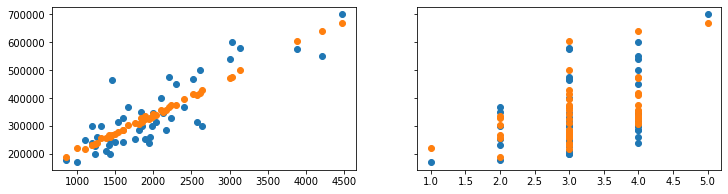

In [60]:
y_pred = np.dot(X_norm, w_final) + b_final
fig, ax = plt.subplots(1, 2, figsize=(12, 3), sharey = True)
for i in range(len(ax)) :
    ax[i].scatter(X_train[:,i], y_train, label = 'target')
    ax[i].scatter(X_train[:,i],y_pred, label = 'predict')
plt.show()